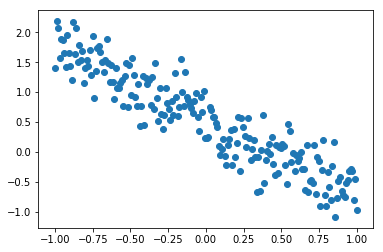

In [91]:
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
from numpy.linalg import inv 

import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt from scipy.spatial.distance

# create multivariate distribution
# generate points along axis
x = np.linspace(-1,1,200)

W = [-1.3,0.5]
eps = np.random.normal(0,0.3,[200,1])
y = W[0]*x + W[1] #+ eps
for i in range(len(y)):
    y[i] = y[i] + eps[i]


# print(y)
plt.scatter(x,y)
# plt.plot(x,y)
plt.show()

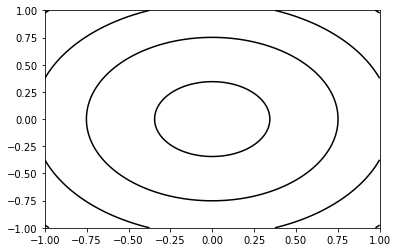

In [88]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

mu = np.array([0,0])
cov = np.eye(2)

# create multivariate distribution
pdf = multivariate_normal(mu,cov) # generate points along axis

x = np.linspace(-1,1,200)
y = np.linspace(-1,1,200)

x1p,x2p = np.meshgrid(x,y)
pos = np.vstack((x1p.flatten(),x2p.flatten()))
pos = pos.T

# evaluate pdf at points
Z = pdf.pdf(pos)
Z = Z.reshape(200,200)

fig = plt.figure()
ax = fig.gca()
pdf_c = ax.contour(x1p,x2p,Z,3,colors='k')

plt.show();

140
[-0.64693725  0.13581679]


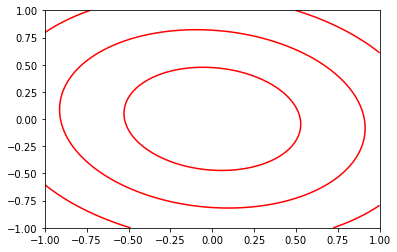

In [94]:
randomIndex = np.random.randint(0,200)
dataPoint = np.array([x[randomIndex],y[randomIndex]])
print(randomIndex)
X= np.ones((1,2))


#padding X 
X[:,0] = dataPoint[0]

Y = np.array([y[randomIndex]])
m_0 = mu
s_0 = cov
beta = 0.3
s_n = inv(inv(s_0) + beta*np.dot(X.T,X))

m_n = np.dot(s_n,((np.dot(inv(s_0),m_0))+beta * np.dot(X.T,Y)))


#mn = np.dot(s_n,total)

#m_n = np.dot(s_n,np.dot(s_0,m_0) + beta*np.dot(X.T,Y))



# print(m_n)

posterior = multivariate_normal(m_n,s_n)
sample = np.random.multivariate_normal(m_n,s_n,5)
print (sample[0])


Z1 = posterior.pdf(pos)
Z1 = Z1.reshape(200,200)

plt.contour(x1p,x2p,Z1,3,colors='red')
plt.show()

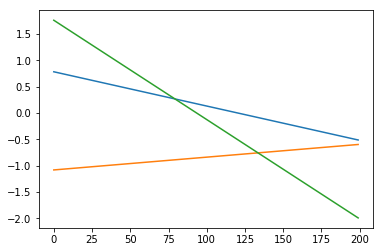

In [96]:
line1 = sample[0][0]*x + sample[0][1]
line2 = sample[1][0]*x + sample[1][1]
line3 = sample[2][0]*x + sample[2][1]
plt.plot(line1)
plt.plot(line2)
plt.plot(line3)
plt.show()

